In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# drawing

In [2]:
# Create a black image
img = np.zeros((512,512,3),dtype=np.uint8)
# The "u" in "uint" is short for "unsigned", meaning the integer doesn't have a sign (it can't be negative).
# Signed 8 bit integers values go from -128 to +127, while unsigned go from 0 to 255

In [3]:
# Draw a green line on it from top-left to bottom-right corners, with green color and thickness of 5 px.
cv2.line(img,(0,0),(511,511),(0,255,0),5) # b"g"r

cv2.imshow('img',img)

cv2.waitKey(0)
#The function waitKey waits for a key event infinitely (when delay≤0 ) or for delay milliseconds#

32

In [4]:
# Draw a rectangle from top-left corner and bottom-right corner of rectangle.
# A red rectangle at the top-right corner of image.
cv2.rectangle(img,(20,20),(100,100),(0,0,255),2) # bg"r"

cv2.imshow('img',img)

cv2.waitKey(0)

32

In [5]:
# Draw a blue circle given its center coordinates and radius.
cv2.circle(img,(150,150),100,(255,0,0),1)

cv2.imshow('img',img)

cv2.waitKey(0)

32

In [6]:
# Polygon's pts is an array of shape ROWSx1x2 where ROWS are number of vertices and it should be of type int32. 
pts = np.array([[100,100],[80,200],[200,230]],np.int32) # 3x2
# reshape pts to ROWSx1x2
pts = pts.reshape((-1,1,2)) # 3x1x2
cv2.polylines(img,[pts],True,(255,255,255),3) # empty inside
# cv2.fillPoly(img,[pts],(255,255,255)) # fill inside

cv2.imshow('img',img)

cv2.waitKey(0)

32

In [7]:
# Adding Text(img, str, position, font type, size, color, thickness, lineType)
# Font type (Check cv.putText() docs for supported fonts)
# lineType = cv.LINE_AA is recommended.
font=cv2.FONT_HERSHEY_COMPLEX 
cv2.putText(img,'opencv',(100,400),font,1,(255,255,255),5,lineType=cv2.LINE_AA)

cv2.imshow('img',img)

cv2.waitKey(0)

32

In [8]:
cv2.destroyAllWindows()

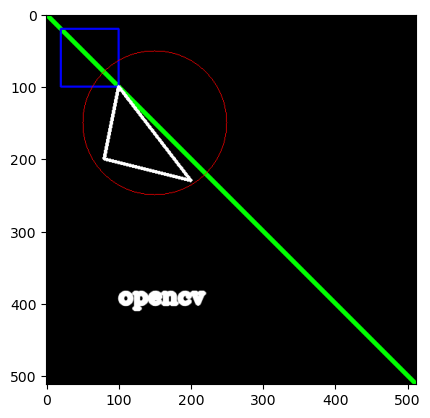

In [9]:
plt.imshow(img)
plt.show()

# Geometric Transformations of Images

https://docs.opencv.org/3.4/da/d6e/tutorial_py_geometric_transformations.html

# Translation

cv2.warpAffine(src, M, dsize)

affine: 線性變換加平移

In [10]:
img_path = os.path.join('data', 'mask.jpg')
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [11]:
height, width, channels = img.shape
print(height, width, channels)

470 780 3


In [12]:
tx = 200
ty = 100

# M: the transformation matrix 
M = np.float32([[1,0,tx],[0,1,ty]]) # tx, ty: shift in x and y directions!
dst = cv2.warpAffine(img,M,(width,height)) # 3rd arg: (width, height)!!!
dst_wh = cv2.warpAffine(img,M,(width*2,height*2))

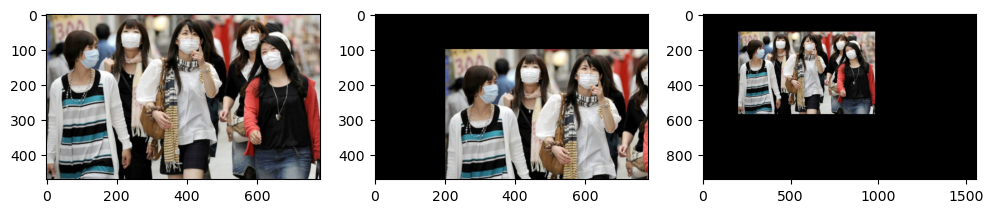

In [13]:
plt.figure(figsize=(12,9),dpi=100)
plt.subplot(131) # row 1 col 3 index 1
plt.imshow(img)

plt.subplot(132) # row 1 col 3 index 2
plt.imshow(dst)

plt.subplot(133) # row 1 col 3 index 3
plt.imshow(dst_wh)

plt.show()

# Rotation

cv2.getRotationMatrix2D(center, angle, scale)

https://cristianpb.github.io/blog/image-rotation-opencv

In [14]:
img_path = os.path.join('data', 'mask.jpg')
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [15]:
height, width, channels = img.shape
print(height, width, channels)

470 780 3


In [16]:
M = cv2.getRotationMatrix2D((width/2,height/2),45,0.7) # anticlockwise
dst = cv2.warpAffine(img,M,(width,height))

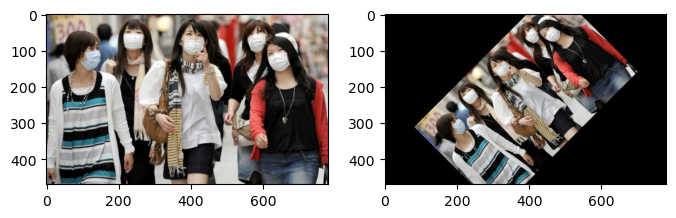

In [17]:
plt.figure(figsize=(8,6),dpi=100)
plt.subplot(121) # row 1 col 2 index 1
plt.imshow(img)

plt.subplot(122) # row 1 col 2 index 1
plt.imshow(dst)

plt.show()